# **EDA**
# **Categorical Featrue Encoding Challenge** 🎯

# 1. 데이터 둘러보기

- 먼저 데이터가 어떻게 구성돼 있는지 살펴보자
- 훈련 / 테스트 / 제출 샘플

In [1]:
import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/cat-in-the-dat/'

In [2]:
train = pd.read_csv(data_path + 'train.csv', index_col = 'id') # 불러올 때 df의 인덱스를 지정하는 파라미터
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission= pd.read_csv(data_path+'sample_submission.csv', index_col = 'id')

In [3]:
train.shape, test.shape

((300000, 24), (200000, 23))

- `T` 메서드를 호출해 행과 열 위치를 바꿔주면 한눈에 보기 편하다

In [4]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [5]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


## 1-1. 피처 요약표 만들기

- 피처 타입? 결측값? 고유한 값은 몇 개? 실제 어떤 값이 입력돼 있는지?
- 이를 위해 **피처 요약표** 만들자
    - 피처별 데이터 타입, 결측값 개수, 고윳값 개수, 실제 입력값 등을 정리한 표

In [6]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(train)

데이터 세트 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


## 1-2. 피처 요약본 해석 👓
- **이진 피처 고윳값** 
    - `T` , `Y`는 `1`로
    - `F`와 `N`은 `0`으로 인코딩



- **명목형 피처**
    - `num_0` ~ `num_4`: 고윳값이 6개 이하
    - `num_5` ~ `num_9`: 고윳값이 많다 / 피처 의미를 알 수 없다
    
    
    
- **순서형 피처**
    - 명목형 데이터와 다르게 순서형은 데이터는 순서가 중요함
    - 순서에 유의해서 인코딩
    - 순서를 파악하기 위해 순서형 피처의 고윳값을 출력해보자
    

In [7]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


- 1 $\Rightarrow$ 2 $\Rightarrow$ 3
- Novice $\Rightarrow$ Contributer $\Rightarrow$ Expert $\Rightarrow$ Master $\Rightarrow$ Grandmaster
- Freezing $\Rightarrow$ Cold $\Rightarrow$ Warm $\Rightarrow$ Hot $\Rightarrow$ Boiling Hot $\Rightarrow$ Lava Hot

In [8]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [9]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


- 지금까지 피처 요약표를 활용해 각 피처별 타입, 결측값 유무, 고윳값 개수, 실제 입력값을 알아봤습니다.

</br>

# 2. 데이터 시각화 📊

- 피처들을 시각화하여 타깃값별 피처 분포를 알아보자
- 그래야 어떤 피처가 중요하고 어떤 고윳값이 타깃값에 영향을 많이 주는지 알 수 있다.
- 타깃값, 이진 피처, 명목형 피처, 순서형 피처 순서로 그려보자

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline # 쥬피터 노트북에서 바로 그래프를 출력할 수 있도록 하는 명령어

## 2-1. 타깃값 분포
- 타깃값 분포를 알면 데이터가 얼마나 불균형한지 파악이 쉽다
- 부족한 타깃값에 더 집중해 모델링 수행 가능


- 수치형 데이터 분포에는 주로 `displot()`을 사용
- 범주형 데이터 분포 파악에는 주로 `countplot()` 사용

In [11]:
mpl.rc('font', size = 15) # 폰트 크기 설정
plt.figure(figsize =  (7, 6) ) # Figure 크기 설정

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

Text(0.5, 1.0, 'Target Distribution')

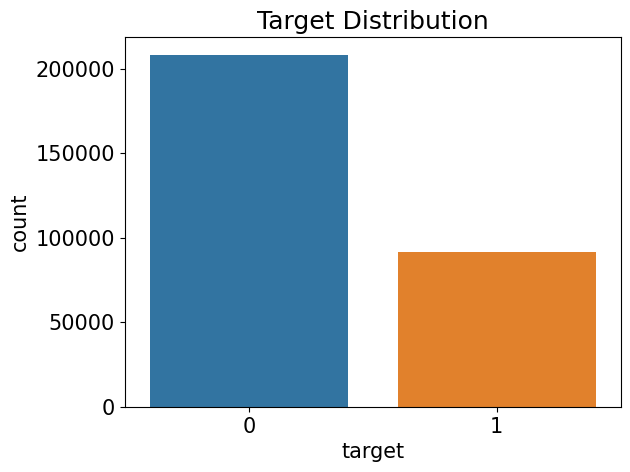

In [12]:
# 타깃값 분포 카운트플롯
ax = sns.countplot(x = 'target', data = train)
ax.set_title('Target Distribution')

- Note that 
- `ax.patches`: ax 축을 구성하는 그래프 도형 객체 모두를 담은 리스트

In [13]:
print(ax.patches)

<Axes.ArtistList of 2 patches>


In [14]:
rectangle = ax.patches[0] # 첫 번째 Rectangle 객체
print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 208236.0
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [15]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train)*0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


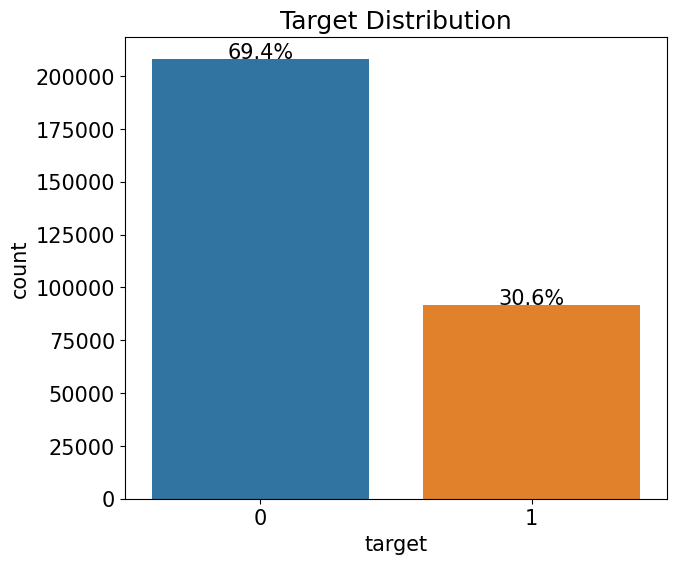

In [16]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height / total_size * 100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

## 2-2. 이진 피처 분포

- 이번에는 이진 피처의 분포를 타깃값별로 따로 그려보자

- 범주형 피러의 타깃값 분포를 고윳값별로 구분해 그려보는 건 분류 문제에서 종종 쓰는 방법
    - 특정 고윳값이 타깃값에 치우치는지 확인할 수 있다

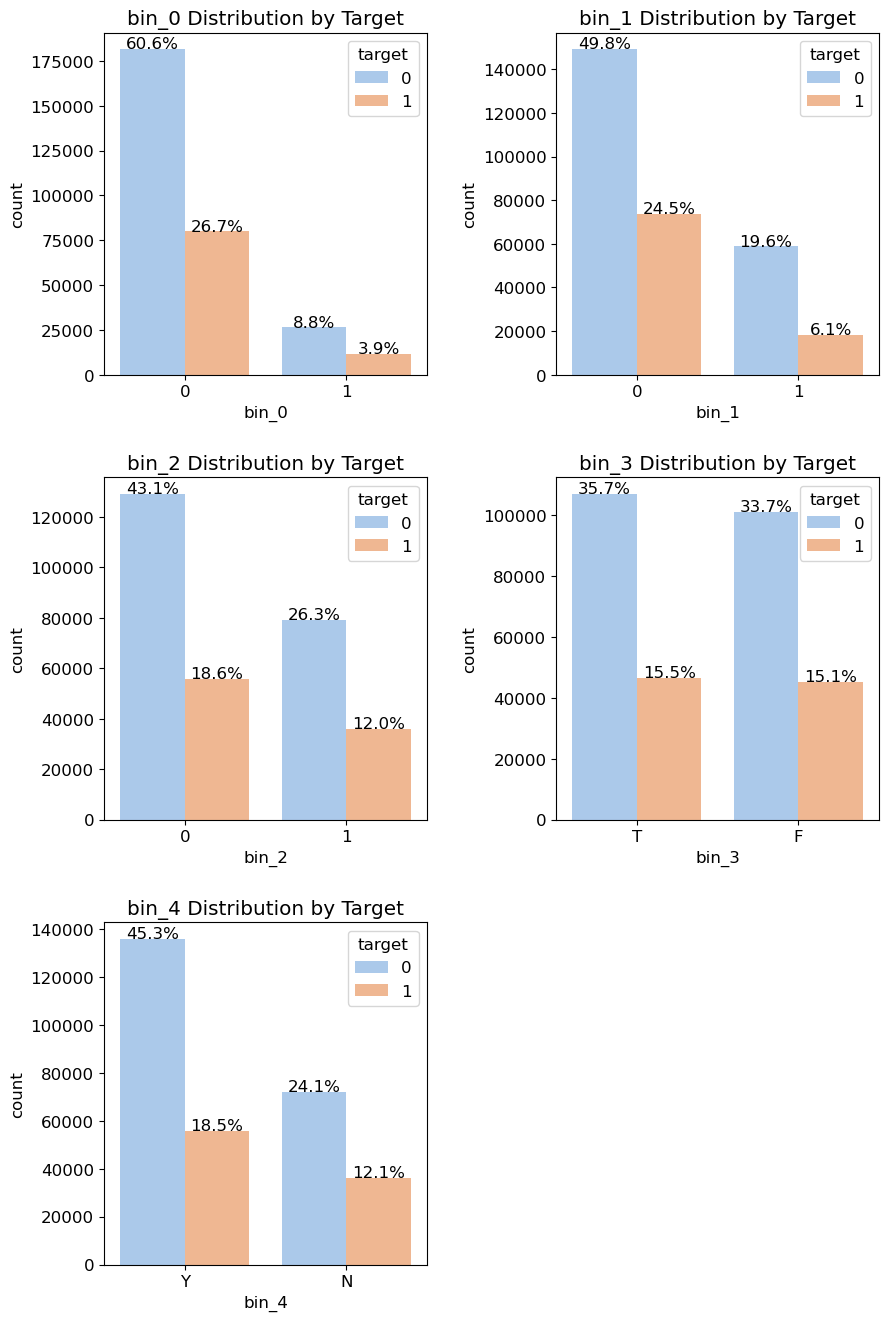

In [17]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록

for idx, feature in enumerate(bin_features): 
    ax = plt.subplot(grid[idx]) 
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))                     # 비율 표시

## 2-3. 명목형 피처 분포

- `nom_0` ~ `nom_4` 피처는 고윳값별로 타깃값 `1` 비율이 다르다
    - 타깃값에 대한 예측 능력 있음

- 한편 `nom_5` ~ `nom_9` 피처는 고윳값도 많고 의미 없는 문자여서 파악 시각화 힘들다
    - 이것들도 원-핫 인코딩을 진행하자


1. 교차분석표 생성 함수 만들기
2. 포인트플롯 생성 함수 만들기
3. 피처 분포도 및 포인트플롯 생성 함수 만들기

### Step 1. 교차분석표 생성 함수 만들기

- **교차표, 교차분석표**: 범주형 데이터 2개를 비교 분석하는 데 사용되는 표
    - 각 범주형 데이터의 빈도나 통계량을 행과 열로 결합해놓은 표
    - 명목형 피처별 타깃값 `1`의 비율을 구하기 위해

In [18]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [19]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


- 인덱스 재설정

In [20]:
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [21]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

## Step 2. 포인트플롯 생성 함수 만들기

- 타깃값 `1`의 비율을 나타내는 포인트플롯을 그리는 함수를 만들자
    - `ax`: 포인트플롯을 그릴 축
    - `feature`: 포인트플롯으로 그릴 피처 
    - `crosstab`: 교차분석표

In [22]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black')                  # 포인트플롯 색상
                        #legend=False)                   # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

## Step 3. 피처 분포도 및 피처별 타깃값 1의 비율 포인트플롯 생성 함수 만들기

In [23]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                  size=(15, 20)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시
       
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

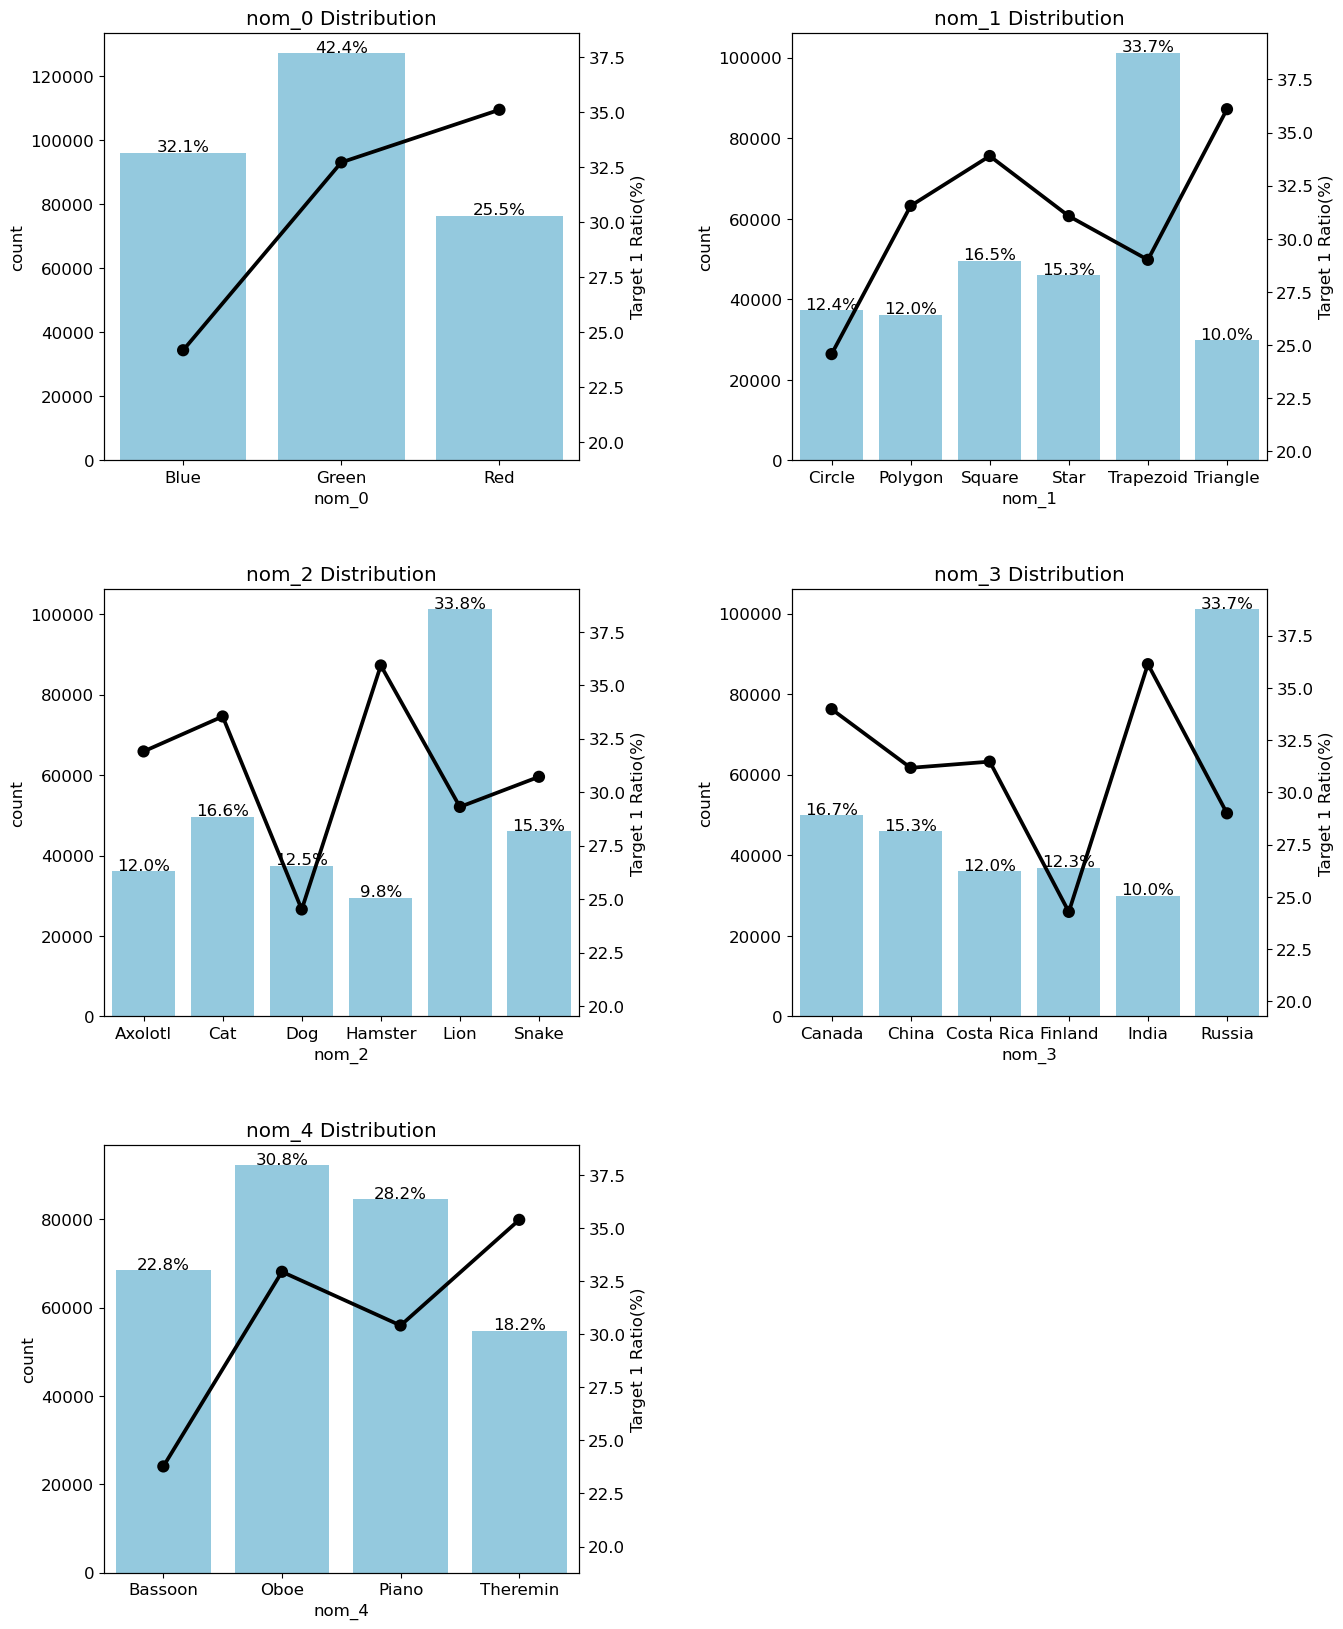

In [24]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

## 2-4. 순서형 피처 분포

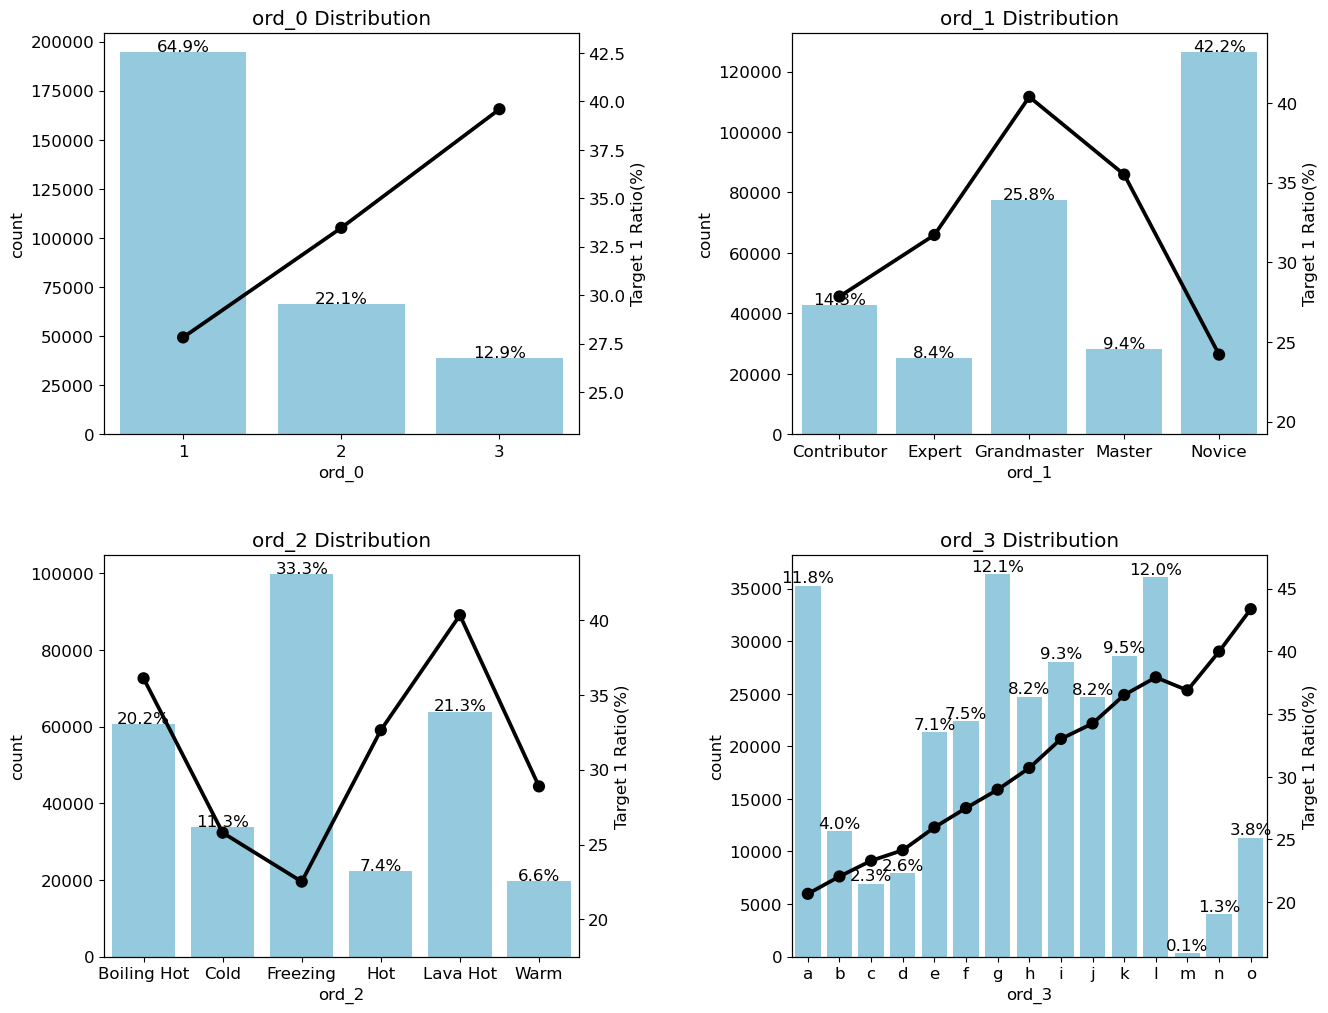

In [25]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

- `CategoricalDtype()`을 이용하여 피처에 순서를 지정

In [26]:
from pandas.api.types import CategoricalDtype 

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

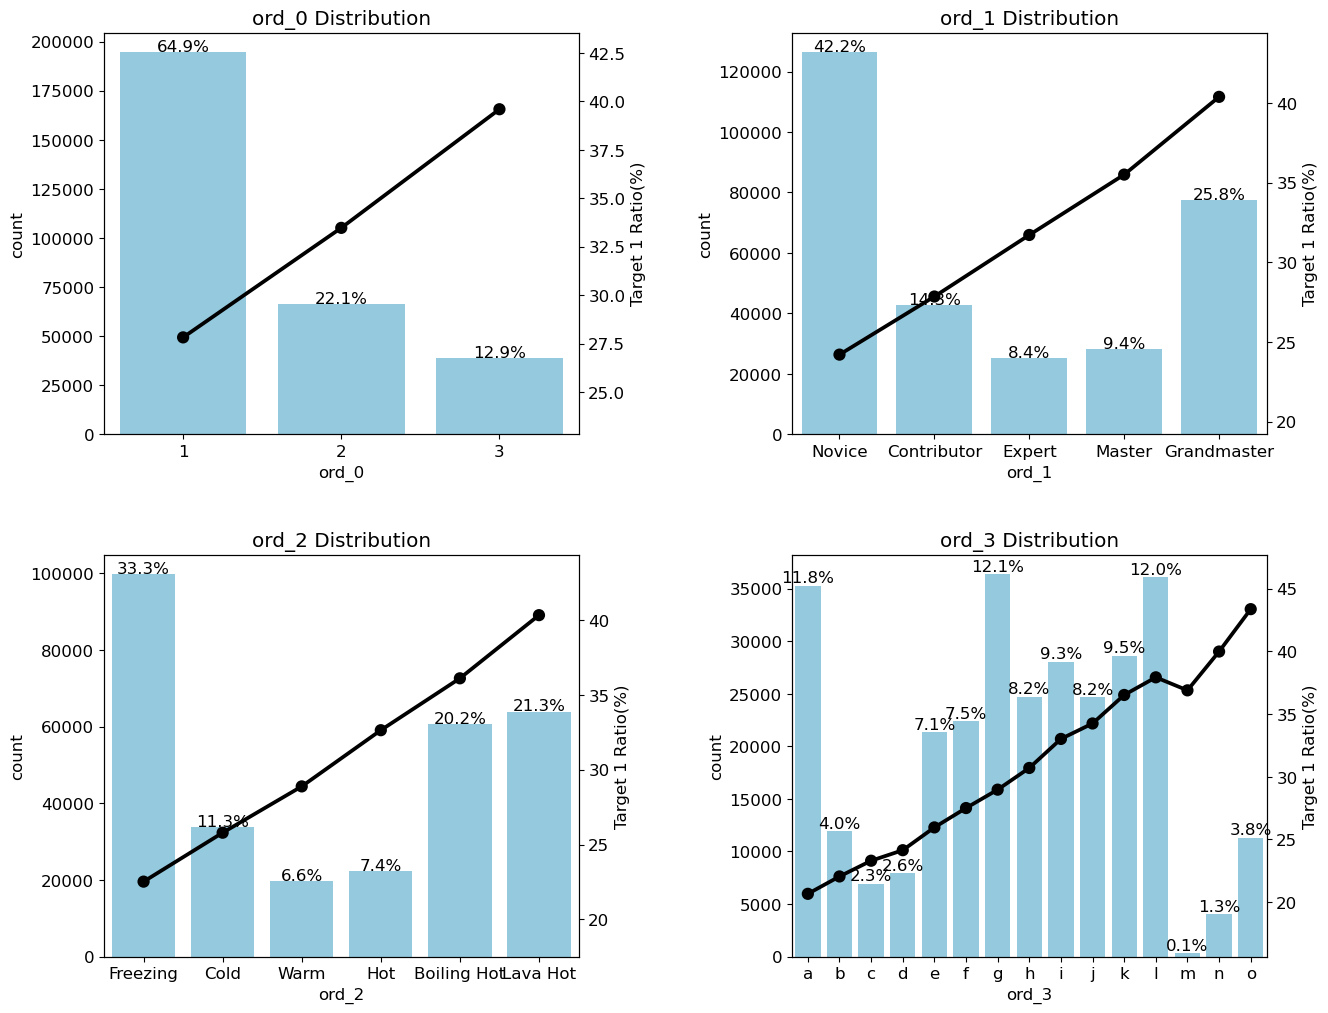

In [27]:
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

- 고윳값 순서에 따라 타깃값 `1`의 비율도 비례해서 커진다

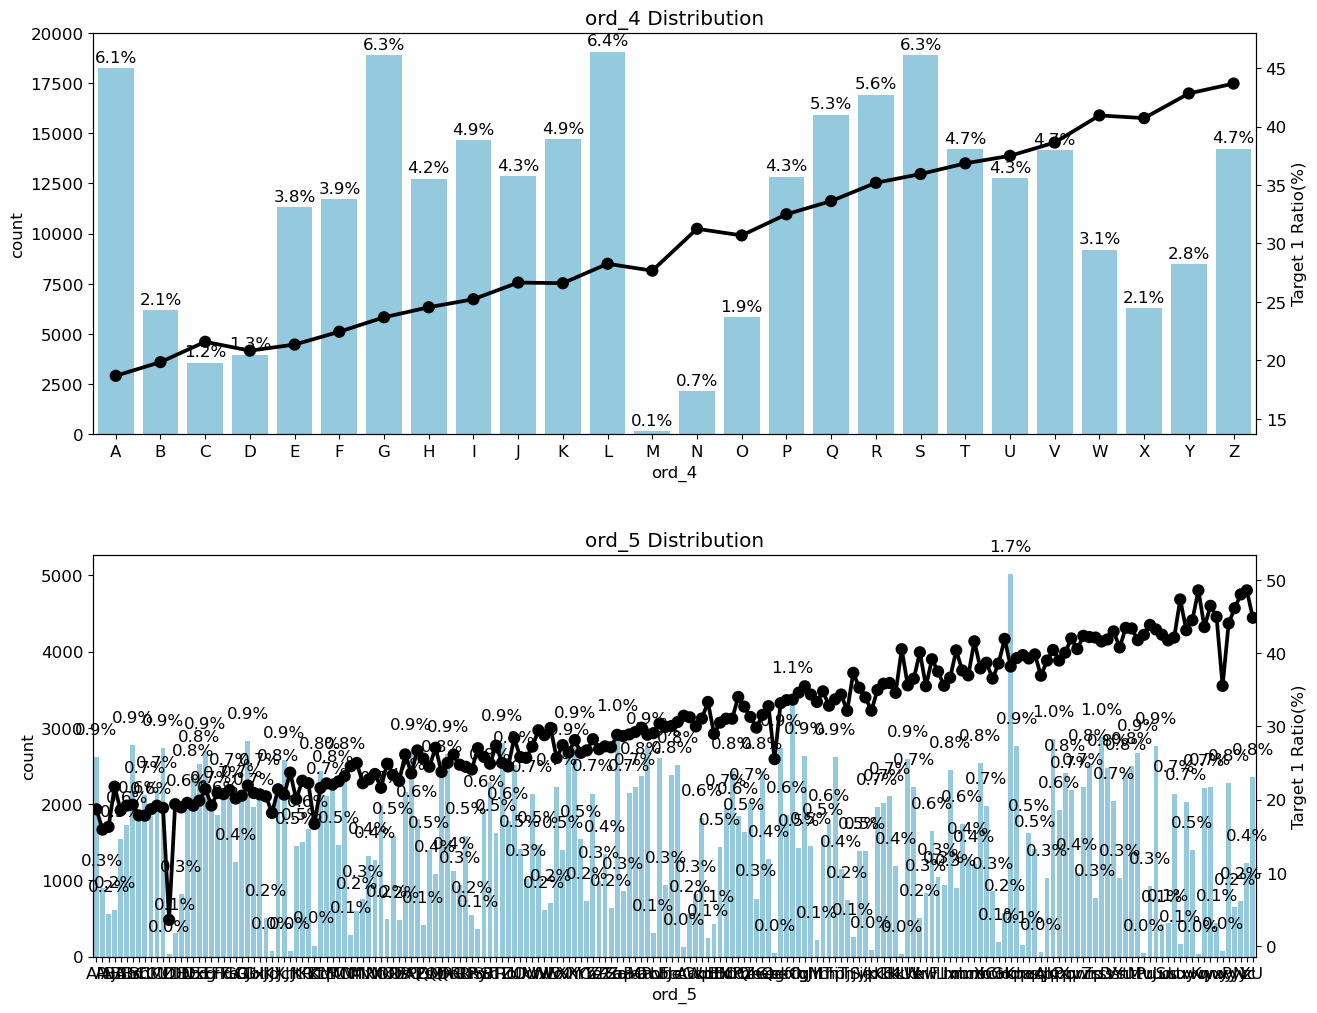

In [28]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], 
                              num_rows=2, num_cols=1, size=(15, 12))

- 💡 따라서 순서형 피처 모두 고윳값 순서에 따라 타깃값이 `1`인 비율이 증가

## 2-5. 날짜 피처 분포

- 날짜 피처 (요일, 월) 분포도 살펴봅시다

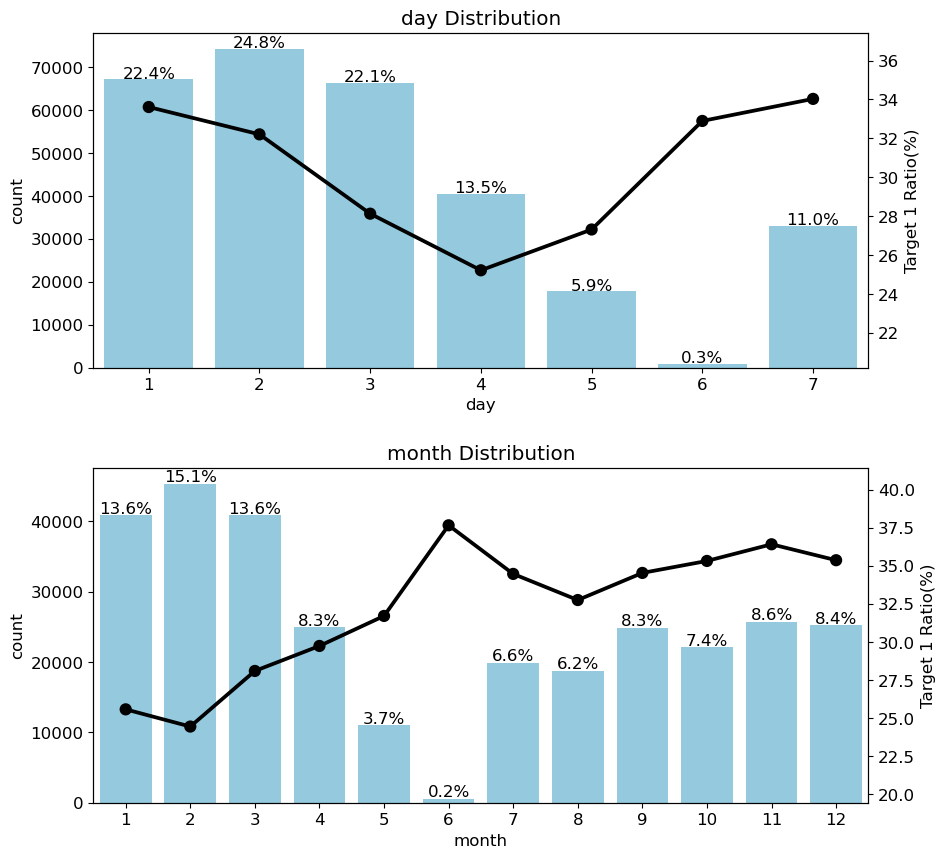

In [29]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, 
                              num_rows=2, num_cols=1, size=(10, 10))

# 3. 베이스라인 모델 📂

In [30]:
import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

## 3-1. 피처 엔지니어링
### 3-1-1. 데이터 합치기

- **인코딩**: 머신러닝 모델은 문자 데이터를 인식하지 못하므로 문자를 숫자로 바꾸는 작업
- 훈련 데이터와 테스트 데이터에 동일한 인코딩을 적용하기 위해 편의상 둘을 합칠 것.

In [31]:
all_data = pd.concat([train, test]) # 훈련 데이터와 테스트 데이터 합치기 
all_data = all_data.drop('target', axis=1) # 타깃값 제거
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


### 3-1-2. 원-핫 인코딩

- 원-핫 인코딩은 대표적인 인코딩 방법

In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성
all_data_encoded = encoder.fit_transform(all_data) # 원-핫 인코딩 적용

### 3-1-2. 데이터 나누기

- 공통으로 적용할 인코딩인 끝났으니 훈련 데이터와 테스트 데이터를 다시 나누자

In [33]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_encoded[:num_train] # 0 ~ num_train - 1행
X_test = all_data_encoded[num_train:] # num_train ~ 마지막 행

y = train['target']

In [34]:
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                      test_size=0.1,
                                                      stratify=y, # 타깃값이 훈련 데이터와 검증데이터에 같은 비율로 포함되게끔 나눠줌
                                                      random_state=10)

## 3-2. 모델 훈련

- 모델을 생성한 뒤, 앞에서 준비한 데이터를 사용해 훈련해보자
- 선형 회귀 방식을 응용해 분류를 수행하는 로지스틱 회귀 모델을 사용하자

In [35]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42) # 모델 생성
logistic_model.fit(X_train, y_train) # 모델 훈련

LogisticRegression(max_iter=1000, random_state=42)

- `max_iter`: 모델의 회귀 계수를 업데이트하는 반복 횟수. 모델 훈련 시 회귀 계수를 업데이트 하면서 훈련하는데, 이때 업데이트를 몇 번 할지를 결정

## 3-3. 모델 성능 검증



In [36]:
logistic_model.predict_proba(X_valid)

array([[0.23265324, 0.76734676],
       [0.91403908, 0.08596092],
       [0.8303673 , 0.1696327 ],
       ...,
       [0.24860685, 0.75139315],
       [0.49451672, 0.50548328],
       [0.95655532, 0.04344468]])

In [37]:
# 검증 데이터를 활용한 타깃 예측 
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]

In [38]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.7965


## 3-4. 예측 및 결과 제출

- 이제 '테스트 데이터'를 활용해 타깃값이 `1`일 확률을 예측하고 결과를 제출해보자

In [39]:
# 타깃값 1일 확률 예측
y_preds = logistic_model.predict_proba(X_test)[:, 1]

In [40]:
# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission.csv')

# 4. 성능 개선 1

- 베이스라인 모델 자체의 성능을 높여보자
- 세 가지의 주안점
    1. **피처 맞춤 인코딩**
        - 인코딩을 피처 특성에 맞게 적용
        - 이진 피처와 순서형 피처 `ord_1`, `ord_2`는 수작업으로 인코딩
        - 순서형 피처 `ord_3`, `ord_4`, `ord_5`는 ordinal 인코딩
        - 명복형 피처와 날짜 피러에는 원-핫 인코딩을 적용
    2. **피처 스케일링**
        - 피처 간 값의 범위를 일치시키는 작업
        - 피처 스케일링에서는 순서형 피처에만 적용
        - 이진 피처, 명목형 피처, 날짜 피처는 인코딩 후 이미 0 ~ 1로 범위가 일치하므로 스케일링을 안 해줘도 됨
    3. **하이퍼파라미터 최적화**
        - 최적 하이퍼파라미터로 모델을 훈련



In [41]:
import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

## 4-1. 피처 엔지니어링 1: 피처 맞춤 인코딩
### 4-1-1. 데이터 합치기


- 인코딩 전, 훈련 데이터와 테스트 데이터를 합쳐 `all_data`를 만들고 타깃값은 제거

In [42]:
# 훈련 데이터와 테스트 데이터 합치기
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis=1) # 타깃값 제거

### 4-1-2. 이진 피처 인코딩

- `bin_0`, `bin_1`, `bin_2`: 이미 `0`과 `1`로만 잘 구성돼 있어 따로 인코딩 하지 않아도 됨
- `bin_3`, `bin_4`: 각각 `T`, `F` / `Y`, `N`이므로 각각 `1`와 `0`으로 바꾸자

In [43]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

### 4-1-3. 순서형 피처 인코딩

- 순서형 피처를 인코딩하자
- `ord_0`: 이미 숫자이므로 인코딩 필요 x
- `ord_1`, `ord_2`: 순서를 정해서 인코딩
- `ord_3`, `ord_4`, `ord_5`: 알파벳 순서대로 인코딩

In [46]:
ord1dict = {'Novice':0, 'Contributor':1, 
            'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 
            'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [47]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder() # OrdinalEncoder 객체 생성
# ordinal 인코딩 적용
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

# 피처별 인코딩 순서 출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

### 4-1-4. 명목형 피처 인코딩

- 명목형 피처는 순서를 무시해도 되므로 원-핫 인코딩 적용

In [48]:
nom_features = ['nom_' + str(i) for i in range(10)] # 명목형 피처

In [50]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # OneHotEncoder 객체 생성
# 원-핫 인코딩 적용
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [51]:
all_data = all_data.drop(nom_features, axis=1) # 기존 명목형 피처 삭제

### 4-1-5. 날짜 피처 인코딩


In [52]:
date_features  = ['day', 'month'] # 날짜 피처

# 원-핫 인코딩 적용
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data = all_data.drop(date_features, axis=1) # 기존 날짜 피처 삭제

encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

## 4-2. 피처 엔지니어링 2: 피처 스케일링

- **피처 스케일링 (feature scaling)**: 서로 다른 피처들의 값의 범위가 일치하도록 조정하는 작업
    - 수치형 피처들의 유효 값 범위가 서로 다르면 훈련이 제대로 안 될 수도 있다.
    
    
### 4-2-1. 순서형 피처 스케일링

In [61]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)] # 순서형 피처
# min-max 정규화
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


### 4-2-2. 인코딩 및 스케일링된 피처 합치기

- `all_data`: DataFrame 형식
- `encoded_nom_matirx`, `encoded_data_matrix`: CSR 형식의 행렬
- `all_data`를 CSR 형식으로 바꿔 합치자

In [54]:
from scipy import sparse

# 인코딩 및 스케일링된 피처 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                               encoded_nom_matrix,
                               encoded_date_matrix],
                              format='csr')

In [55]:
all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9540660 stored elements in Compressed Sparse Row format>

- `500000x16306` 크기를 DataFrame으로 처리하면 메모리 낭비가 심하고 훈련 속도가 낮아짐

### 4-2-3. 데이터 나누기

In [56]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_sprs[:num_train] # 0 ~ num_train - 1행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['target']

In [57]:
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                      test_size=0.1,
                                                      stratify=y,
                                                      random_state=10)

## 4-3. 하이퍼 파라미터 최적화

- 모델을 생성하고 평가지표를 ROC AUC로 지정해 그리드서치를 수행

# 5. 성능 개선2

In [64]:
import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [65]:
# 훈련 데이터와 테스트 데이터 합치기
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis=1) # 타깃 값 제거

In [66]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

In [67]:
ord1dict = {'Novice':0, 'Contributor':1, 
            'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 
            'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [68]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder() # OrdinalEncoder 객체 생성
# ordinal 인코딩 적용
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

# 피처별 인코딩 순서 출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [69]:
nom_features = ['nom_' + str(i) for i in range(10)] # 명목형 피처

In [70]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # OneHotEncoder 객체 생성
# 원-핫 인코딩 적용
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [71]:
all_data = all_data.drop(nom_features, axis=1) # 기존 명목형 피처 삭제

In [72]:
date_features  = ['day', 'month'] # 날짜 피처

# 원-핫 인코딩 적용
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data = all_data.drop(date_features, axis=1) # 기존 날짜 피처 삭제

encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

In [73]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)] # 순서형 피처
# min-max 정규화
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

In [74]:
from scipy import sparse

# 인코딩 및 스케일링된 피처 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                               encoded_nom_matrix,
                               encoded_date_matrix],
                              format='csr')

In [75]:
all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

In [76]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_sprs[:num_train] # 0 ~ num_train - 1행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['target']

In [77]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

# 하이퍼파라미터 값 목록
lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000], 
             'solver':['liblinear'], 'random_state':[42]}

# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                         param_grid=lr_params,
                                         scoring='roc_auc', # 평가지표
                                         cv=5)
# 그리드서치 수행
gridsearch_logistic_model.fit(X_train, y)

print('최적 하이퍼파라미터:', gridsearch_logistic_model.best_params_)

최적 하이퍼파라미터: {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
CPU times: user 20min 18s, sys: 15min 10s, total: 35min 29s
Wall time: 9min 10s


In [79]:
# 타깃값 1일 확률 예측
y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission2.csv')
submission.to_csv('submission.csv')